# Lab 1 - Convolution Problems

Spencer Y. Ki

Prof. D. Jones

PHY408H1S

Wednesday, the 8th of February, 2023.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

# A Discrete Convolution Program (5 pts)

Collaborators: None

Write a discrete convolution function `myConv` that convolves two arrays {$f_i, i = 0, \dots , N_f-1$}
and {$w_j, j = 0, \dots , N_w-1$} to obtain an output time series {$g_n$}. For simplicity, assume a fixed sampling interval $\Delta = 1$, and further, that $f$ and $w$ are $0$ outside of their sampled regions.

 1. How long is {$g_n$}? In other words, how many non-zero points can it have? Justify your answer. 
 
The discrete convolution of two arrays returns an array of their combined length minus 1 (i.e., `(len(f) + len(1) - 1)`). Consider the shorter array to be $f$ with length ${n}_{f}$ — accordingly consider $f$'s first element to be ${f}_{0}$. To calculate every point in the convolution, ${f}_{0}$ would need to 'pair' (i.e., mutliply and sum with) every element in the longer array once. Once it has accomplished this, it would then have to additionally 'pair' with zero ${n}_{f} - 1$ times as the remaining ${n}_{f} - 1$ elements continue to pair with elements in the longer array. In this manner, one may observe that the resultant discrete convolution array will be the combined length of the original two arrays, less one.

2. Please copy and paste your function `g = myConv(f, w)` to the PDF report.

In [2]:
def myConv(f: np.ndarray, w: np.ndarray) -> np.ndarray:
    """
    f: (np.ndarray) A 1-dimensional numeric array of length greater than 0.
    w: (np.ndarray) A 1-dimensional numeric array of length greater than 0.
    return: (np.ndarray) A 1-dimensional numeric array of length len(f) + len(w) - 1
    
    Convolves arrays f and w and returns the convolution.
    """
    # Condition identifies the longer array and appends appropriate zeroes to it.
    if len(f) > len(w):
        shorter = np.flip(w)
        longer = np.append(np.zeros(len(shorter) - 1), 
                           np.append(f, np.zeros(len(shorter) - 1)))
    else:
        shorter = np.flip(f)
        longer = np.append(np.zeros(len(shorter) - 1), 
                           np.append(w, np.zeros(len(shorter) - 1)))
    
    result = []
    # Outer loop iterates through all the values in the convolution array.
    for i in range(len(f) + len(w) - 1):
        start = i
        products = 0
        # Inner loop calculates entries in convolution array via repeated addition.
        for j in range(len(shorter)):
            products += longer[start] * shorter[j]
            start += 1
        result.append(products)
    
    return np.array(result)

 3. Provide a test to convince yourself (and me) that your function agrees with `numpy.convolve`. For example, generate two random timeseries $f$, $w$ with $N_f=75$, $N_w=150$, drawing each element from $U[0,1]$, and plot the difference between your function's output and numpy's. Include the code for your test in the PDF report.

Text(0.5, 1.0, 'Differnece in Test Convolution Output\nnp.convolve vs MyConv')

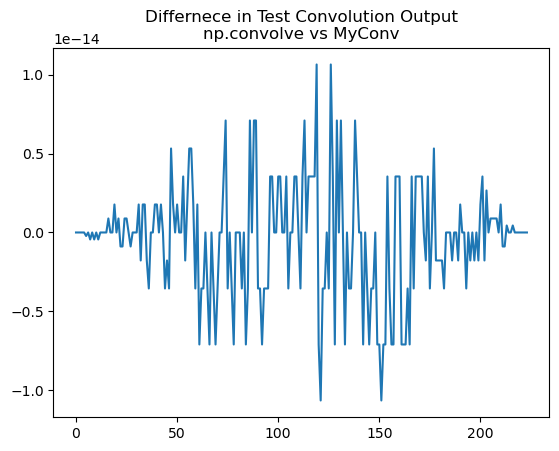

In [3]:
np.random.seed(408)

# Generating test random time series
test_f = np.random.rand(75)
test_w = np.random.rand(150)

# Applying the convolution functions to the test random time series
np_test = np.convolve(test_f, test_w)
my_test = myConv(test_f, test_w)

# Plotting results
plt.figure()
plt.plot(np_test - my_test)
plt.title("Differnece in Test Convolution Output\nnp.convolve vs MyConv")

The figure above depicts the difference between every pair of element of two test discrete convolutions performed by `np.convolve` and `myConv` on the same data. As can be seen in the y-axis' scale, all elements are within a $1 x 10^{-14}$ difference from their counterpart. These differences are likely caused by round-off error, and are sufficiently small to conclude that `np.convolve` and `myConv` agree with one another.

 4. Compare the speed of your `myConv` function to the NumPy function. Provide a plot of the comparison, and include your python code in the PDF report. Is your function faster or slower than the NumPy function? Can you suggest why that is the case?

_Hint_: For the speed test part, make up your own $f_i$ and $w_j$ time series, and for simplicity, study the cases
of $N_f = N_w = 10, 100, 1000, 10000$. To accurately time each computation of the convolution function, import the
time module and place calls to `time.time` around your code:
```
import time
t1 = time.time()
g = myConv(f, w)
t2 = time.time()
print(t2-t1)
```
Alternatively, use the `timeit` module:
```
import timeit
print(timeit.timeit('g = myConv(f, w)', number=10000))
```

Text(0.5, 1.0, 'Difference in Convolution Function Execution Time, myConv - np.convolve')

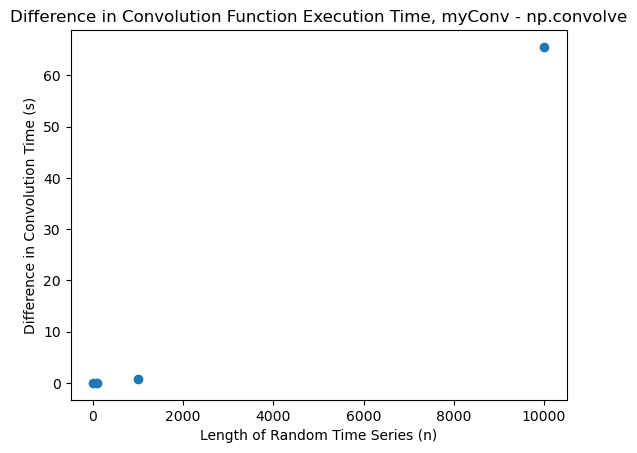

In [4]:
np.random.seed(408)

sizes  = [10, 100, 1000, 10000]
times = []
# Loop generates test random time series of specified lengths
# and times their convolution times via the two functions.
for size in sizes:
    test_f = np.random.rand(size)
    test_w = np.random.rand(size)
    
    t1 = time.time()
    np.convolve(test_f, test_w)
    t2 = time.time()
    
    t3 = time.time()
    myConv(test_f, test_w)
    t4 = time.time()
    
    times.append(t4 - t3 + t2 - t1)
    
# Plotting the results
plt.figure()
plt.scatter(sizes, times)
plt.xlabel("Length of Random Time Series (n)")
plt.ylabel("Difference in Convolution Time (s)")
plt.title("Difference in Convolution Function Execution Time, myConv - np.convolve")

The figure above depicts the relationship between the lengths $n$ of two randomly generated discrete time series, and the times it takes to convolve them via different functions. The values on the y-axis are the difference in seconds between the time taken by `myConv` to convolve the arrays, and the time taken by `np.convolve` to convolve the arrays.

As can be observed in the figure, `myConv` is uniformly slower than `np.convolve`, but the difference is largely negligible at low values of $n$. Unfortunately, this difference is quite substantial at larger values of $n$ (i.e., $n = 10,000$ in this case). This is likely due to inefficiencies in how `myConv` calculates a convolution. For example, `myConv` employs a for loop nested in a for loop, while `np.convolve`'s documentation outlines that it only needs one loop to calculate a convolution.

# Simple Physical System: RL Circuit Response (7 pts)

Collaborators: None (although [Khan Academy was referenced for RL circuits refresher](https://www.khanacademy.org/science/electrical-engineering/ee-circuit-analysis-topic/ee-natural-and-forced-response/a/ee-rl-natural-response))

Consider a simple physical system consisting of a resistor (with resistance `R`) and an inductor (with inductance `L`) in series.  We apply an input voltage $a(t)$ across the pair in series, and measure the output
voltage $b(t)$ across the inductor alone. For this linear system,

 1. Show analytically that its step response (i.e., the $b(t)$ we obtain when the input voltage $a(t) = H(t)$,
    the Heaviside function) is given by

    $$ S(t) = e^{-Rt/L} H(t), $$

    and its impulse response (i.e., the output voltage $b(t)$ when $a(t) = \delta(t)$) is given by

    $$ R(t) = \delta(t) - \frac{R}{L} e^{-Rt/L} H(t). $$

    _Hint_: Construct and solve the ODE relating the voltages under consideration. Consider the two $b(t)$ choices to derive $S(t)$ and $R(t)$. Formulas $\frac{d}{dt} H(t) = \delta(t)$ and $\delta(t) f(t) = \delta(t) f(0)$ may help.

__General and Step Response Cases__

i. By Kirchhoff's laws, the voltage over the resistor ${v}_{R}$ and the voltage over the inductor ${v}_{L}$ sum to zero (i.e., ${v}_{R} + {v}_{L} = 0$).

ii. By Ohm's law and the inductor i-v equation, this relationship can be restated as ${v}_{R} + {v}_{L} = IR + \frac{di}{dt}L = I\frac{R}{L} + \frac{di}{dt} = 0$. This is a first-order homogenous linear differential equation.

iii. The general solution to this category of ODEs is trivial — one may easily identify this problem's general solution as $I(t) = A{e}^{-\frac{R}{L}t}$ for some unknown $A$.

iv. At initial time $t = 0$ the general solution yields $I(0) = A$. Therefore $A$ is just the input current ${I}_{0}$.

v. By Ohm's law, $RI(t) = V(t) = b(t)$. Accordingly, $RI(0) = V(0) = a(t)$. As such, one may take the general solution and conclude that $b(t) = a(t){e}^{-\frac{R}{L}t}$.

vi. For the Heaviside function, this yields $S(t) = e^{-Rt/L} H(t)$ as stated above.

QED

__Impulse Response Case__

vii. Taking the derivative of $S(t)$, by the product rule one obtains $\frac{d}{dt}S(t) = \frac{d}{dt}(e^{-Rt/L})H(t) + e^{-Rt/L}\frac{d}{dt}H(t)$

viii. Trivially, $\frac{d}{dt}(e^{-Rt/L})H(t) = - \frac{R}{L} e^{-Rt/L} H(t)$.

ix. By the given formulae $\frac{d}{dt} H(t) = \delta(t)$ and $\delta(t) f(t) = \delta(t) f(0)$, one can see that $e^{-Rt/L}\frac{d}{dt}H(t) = e^{-Rt/L}\delta(t) = e^{-R(0)/L}\delta(t) = \delta(t)$.

x. Combining the previous two steps, one can see that $\frac{d}{dt}S(t) = \frac{d}{dt}(e^{-Rt/L})H(t) + e^{-Rt/L}\frac{d}{dt}H(t) = \delta(t) - \frac{R}{L} e^{-Rt/L} H(t) = R(t)$ as given above.

This is logical given the relationship between the Heaviside function and the Dirac delta function — the latter can be considered a normalised, infinitesimal slice of the former. Discretely, the Dirac delta would be a normalised single entry in the Heaviside array.

QED

2. Discretize the impulse response $R(t)$ function, realizing that $H(t)$ should be discretized as

    $$H = [0.5, 1, 1, \dots],$$

    and $\delta(t)$ should be discretized as

    $$D = [1/dt, 0, 0, \dots].$$

    Take advantage of your `myConv` function, or the NumPy built-in function `convolve`, and write
    your own Python function `V_out = RLresponse(R,L,V_in,dt)` to take an input series $V_{in}$ sampled
    at $\Delta = dt$, and calculate the output series $V_{out}$ sampled by the same $dt$. Please paste your
    Python function here (if you are not using a jupyter notebook). (Hint: here $\Delta$ may not be 1, so remember to build the multiplication of
    $\Delta$ into your convolution function.)

In [5]:
def impulse(R: int, L: int, V_in: np.ndarray, dt: float) -> np.ndarray:
    """
    R: (int) An int representing the circuit resistor's resistance.
    L: (int) An int representing the circuit inductor's inductance.
    V_in: (np.ndarray) An array representing an input series of voltages.
    dt: (float) A float representing the sampling period.
    returns: (np.ndarray) An array representing the circuit's impulse response.
    
    Calculates the impulse response of the circuit.
    """
    T = np.arange(0, len(V_in) * dt, dt)# Time values, properly spaced
    H = np.append(0.5, np.ones(len(V_in) - 1))# Discrete Heaviside
    D = np.append(1/dt, np.zeros(len(V_in) - 1))# Discrete Dirac delta
    return D - R/L * np.exp(-R * T / L) * H

def RLresponse(R: int, L: int, V_in: np.ndarray, dt: float) -> np.ndarray:
    """
    R: (int) An int representing the circuit resistor's resistance.
    L: (int) An int representing the circuit inductor's inductance.
    V_in: (np.ndarray) An array representing an input series of voltages.
    dt: (float) A float representing the sampling period.
    returns: (np.ndarray) An array representing the output series of voltages.
    
    Calculates the output voltages over the inductor.
    """
    return np.convolve(impulse(R, L, V_in, dt), V_in, mode = "same") * dt

3. Using $R = 1000 \Omega$, $L = 3 H$, and sampling period $dt = 0.25 \text{ ms}$, test your RL-response
    function with {$H_n$} series (discretized $H(t)$) as input, and plot the output time series (as circles) on
    top of the theoretical curve $S(t)$ given by part 1 (as a solid line). Repeat this for {$D_n$} (discretized
    $\delta(t)$) and $R(t)$. Make the time range of the plots 0 to at least 25 ms. Please list your Python
    code here (if you are not using a jupyter notebook).

Text(0.5, 1.0, 'RL-Response vs. R(t) Curve over Time')

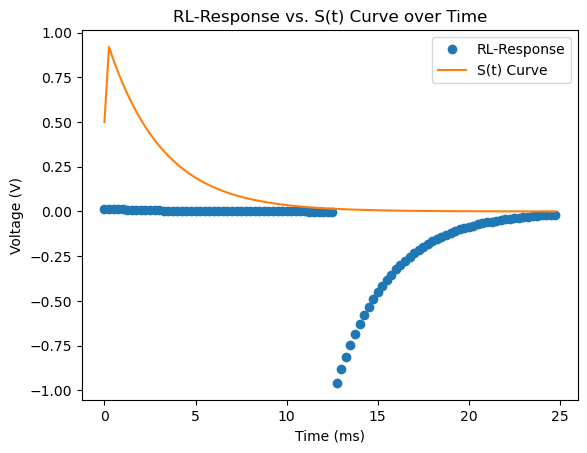

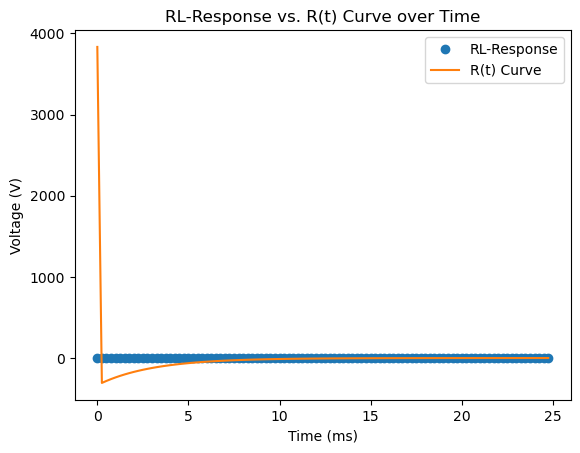

In [6]:
def step(R: int, L: int, V_in: np.ndarray, dt: float) -> np.ndarray:
    """
    R: (int) An int representing the circuit resistor's resistance.
    L: (int) An int representing the circuit inductor's inductance.
    V_in: (np.ndarray) An array representing an input series of voltages.
    dt: (float) A float representing the sampling period.
    returns: (np.ndarray) An array representing the output series of voltages.
    
    Calculates the voltages in the circuit system.
    """
    T = np.arange(0, len(V_in) * dt, dt)# Time values, properly spaced
    H = np.append(0.5, np.ones(len(V_in) - 1))# Discrete Heaviside
    return np.exp(-R * T / L) * H

# Discretised series; for 0.25ms samples, 100 entries results in 25ms.
Time = np.arange(0, 25, 0.25)
Heav = np.append(0.5, np.ones(99))
Dirac = np.append(1/0.00025, np.zeros(99))

# Plotting the results
plt.figure()
plt.plot(Time, RLresponse(1000, 3, Heav, 0.00025), 'o', label = "RL-Response")
plt.plot(Time, step(1000, 3, Heav, 0.00025), '-', label = "S(t) Curve")
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("RL-Response vs. S(t) Curve over Time")

plt.figure()
plt.plot(Time, RLresponse(1000, 3, Dirac, 0.00025), 'o', label = "RL-Response")
plt.plot(Time, impulse(1000, 3, Dirac, 0.00025), '-', label = "R(t) Curve")
plt.legend()
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (V)")
plt.title("RL-Response vs. R(t) Curve over Time")

# Convolution of a thermal infrared Spectrum (8 pts)

Collaborators: None

The Tropospheric Emission Spectrometer (TES) is a Fourier transform spectrometer that was launched by NASA on the Aura spacecraft in July 2004. The instrument measures radiation from the atmosphere in the thermal infrared region of the spectrum. The file `TES_spectra.txt` contains TES measurements on 10 July 2010 from the 2B1 filter on TES. In this spectral region, vertical profiles of atmopsheric temprature and water vapour can be retrieved. (The file contains the spectrum as a function of wavenumbers $\tilde{\nu} = 1/\lambda$ in units of cm$^{-1}$). One way of simulating the spectrum that might be measured by a low-resolution version of TES is by convolving the TES high-resolution spectrum with the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$, where $\Delta$ is a measure of the spectral resolution.

__Note__

* The spectrum in  `TES_Spectra.txt` is given as a text file with two columns: the first column contains the wavenumber of the measurement (in units of cm$^{-1}$) and the second column has the spectral signal (in Watts cm$^{-2}$ sr$^{-1}$/cm$^{-1}$).
* Use `mode='same'` when calling numpy convolve to truncate the convolution to the max of the supplied arrays (i.e. length of the high-resolution timeseries in our case). This is convenient, since we want to compare the convolution output to the original timeseries.  
* As a check for Parts 4 and 5, ensure that your convolved timeseries is aligned with (or "overlaps") the original timeseries.

In [7]:
# Loading the data
TES_data = np.loadtxt("TES_Spectra.txt", unpack=True)
wavenumbers = TES_data[0]
spectra = TES_data[1]

1. Plot the TES spectrum as a function of wavenumber. 

Text(0.5, 1.0, 'TES Spectrum vs. Wavenumber')

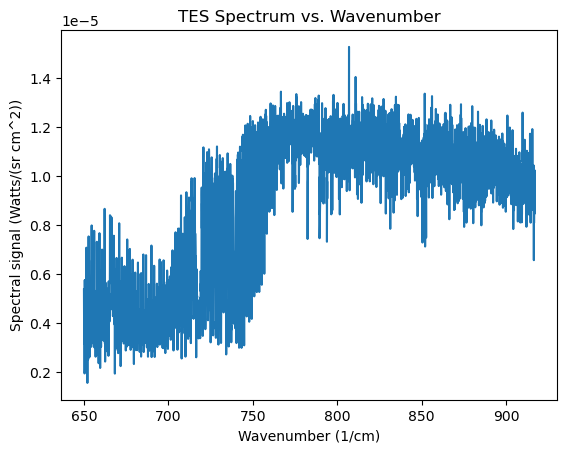

In [8]:
plt.figure()
plt.plot(wavenumbers, spectra)
plt.xlabel("Wavenumber (1/cm)")
plt.ylabel("Spectral signal (Watts/(sr cm^2))")
plt.title("TES Spectrum vs. Wavenumber")

2. Plot the function $2\Delta\sin(2\pi \tilde{\nu}\Delta)/(2\pi \tilde{\nu}\Delta)$ over the interval $\tilde{\nu}=[-3,3]$, with $\Delta \tilde{\nu} = 0.06$ cm$^{-1}$, for values of $\Delta = 1$ and $\Delta =3$.

Text(0.5, 1.0, 'Function Specified Above, Resolution = 3')

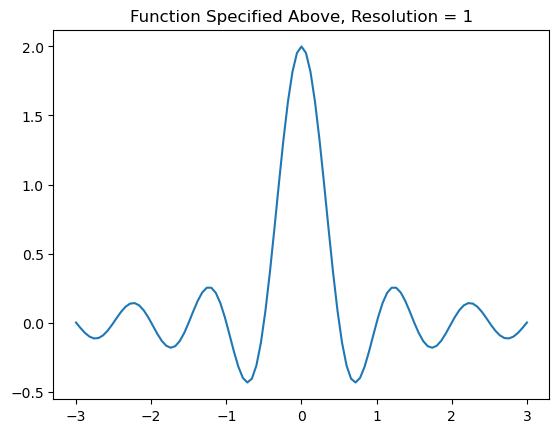

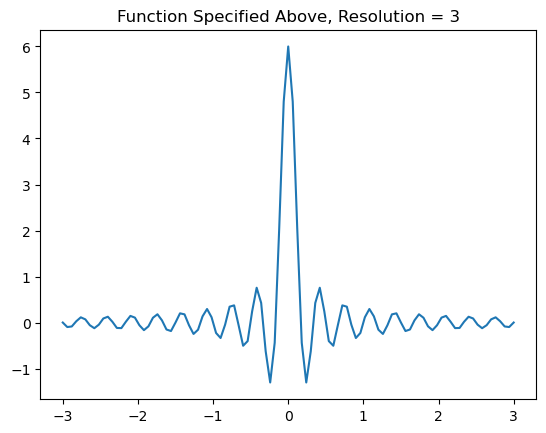

In [9]:
def blurrer(wavenumber: float, resolution: int) -> float:
    """
    wavenumber: (float) A float representing a wavenumber.
    resolution: (int) An int representing the spectral resolution.
    return: (float) A float representing the 'blurred' spectrum.
    
    'Blurs' the spectrum by the given resolution as described in the lab manual.
    """
    return 2 * resolution * np.sin(2 * np.pi * wavenumber * resolution) / \
        (2 * np.pi * wavenumber * resolution)

# Calculating the specified function outputs
interval = np.arange(-3.0, 3.01, 0.06)
res_1 = blurrer(interval, 1)
res_3 = blurrer(interval, 3)

# Plotting the results
plt.figure()
plt.plot(interval, res_1)
plt.title("Function Specified Above, Resolution = 1")

plt.figure()
plt.plot(interval, res_3)
plt.title("Function Specified Above, Resolution = 3")

3.	Use numpy's convolve function to convolve the high-resolution spectrum in the file `TES_Spectra.txt` separately with the two curves in Part 2 (i.e., for $\Delta = 1$ and $\Delta = 3$).

Text(0.5, 1.0, 'Curve Convolved TES Spectra, Resolution = 3')

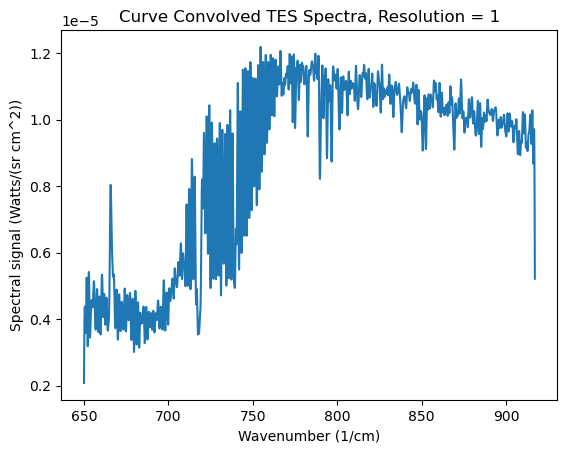

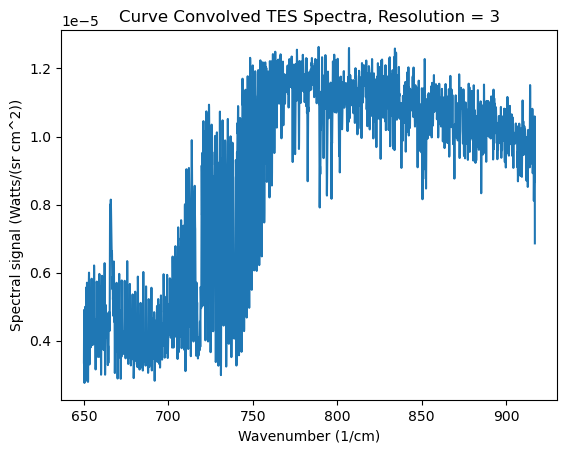

In [10]:
# Calculating the convolutions
conv_1 = np.convolve(spectra, res_1, mode = "same")*0.06
conv_3 = np.convolve(spectra, res_3, mode = "same")*0.06

# Plotting the results
plt.figure()
plt.plot(wavenumbers, conv_1)
plt.xlabel("Wavenumber (1/cm)")
plt.ylabel("Spectral signal (Watts/(sr cm^2))")
plt.title("Curve Convolved TES Spectra, Resolution = 1")

plt.figure()
plt.plot(wavenumbers, conv_3)
plt.xlabel("Wavenumber (1/cm)")
plt.ylabel("Spectral signal (Watts/(sr cm^2))")
plt.title("Curve Convolved TES Spectra, Resolution = 3")

4.	For each of the two cases, plot the original and convolved time series over the wavenumber range $[700,750]$. Comment on the differences in the convolved time series between the two cases.

Text(0.5, 1.0, 'Original vs. Convolved TES Spectra,\nResolution = 3')

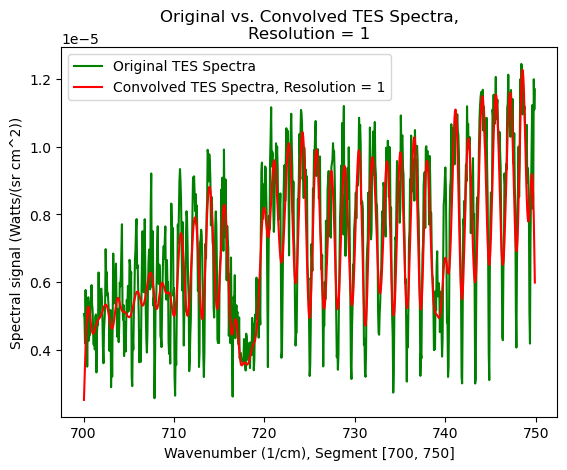

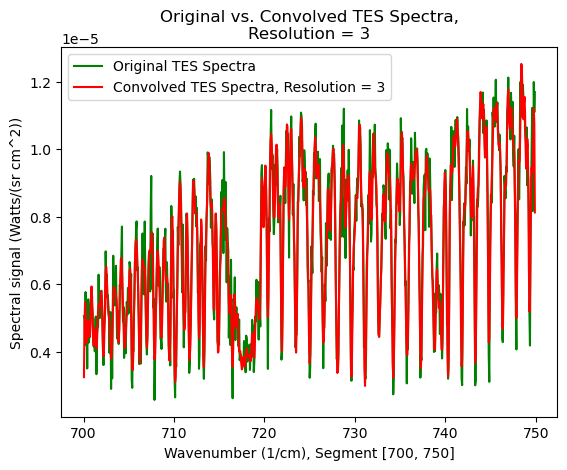

In [11]:
# By inspection, wavenumber range [700, 750] corresponds to indices [834, 1666]
conv_1 = np.convolve(spectra[834:1666], res_1, mode = "same")*0.06
conv_3 = np.convolve(spectra[834:1666], res_3, mode = "same")*0.06

# Plotting the results
plt.figure()
plt.plot(wavenumbers[834:1666], spectra[834:1666], color = 'g', label = 'Original TES Spectra')
plt.plot(wavenumbers[834:1666], conv_1, color='r', label = 'Convolved TES Spectra, Resolution = 1')
plt.legend()
plt.xlabel("Wavenumber (1/cm), Segment [700, 750]")
plt.ylabel("Spectral signal (Watts/(sr cm^2))")
plt.title("Original vs. Convolved TES Spectra,\nResolution = 1")

plt.figure()
plt.plot(wavenumbers[834:1666], spectra[834:1666], color = 'g', label = 'Original TES Spectra')
plt.plot(wavenumbers[834:1666], conv_3, color='r', label = 'Convolved TES Spectra, Resolution = 3')
plt.legend()
plt.xlabel("Wavenumber (1/cm), Segment [700, 750]")
plt.ylabel("Spectral signal (Watts/(sr cm^2))")
plt.title("Original vs. Convolved TES Spectra,\nResolution = 3")

As can be seen in the figures above, the higher resolution convolution conforms to the original data better than the lower resolution convolution. This 'overfitting' is functioning as intended, as higher resolution convolutions 'pull' more data from surrounding points to inform their calculation — this can be seen in the greater number of peaks and troughs present in the plot of the Resolution = 3 function in Part 2. More general patterns are more easily percieved with lower resolution convolutions.

5. Consider convolving the spectrum with the following Gaussian: $g(\tilde{\nu}) = \frac{1}{\sqrt{\pi}L} e^{-(\tilde{\nu}/L)^2}.$

   Plot The Guassian for $L=0.5$ (over the interval $\tilde{\nu}=[-3,3]$) and the timeseries of the convolution of the TES spectrum with the Gaussian (over the range [700,750]). Comment on the differences between the this convolved time series and those from Part 4.

Text(0.5, 1.0, 'Original vs. Gaussian Convolved TES Spectra,\nResolution = 1')

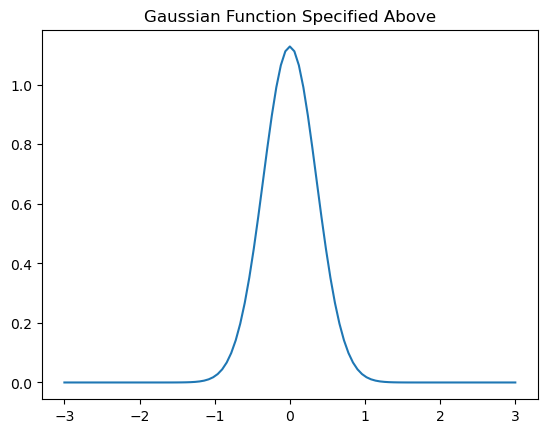

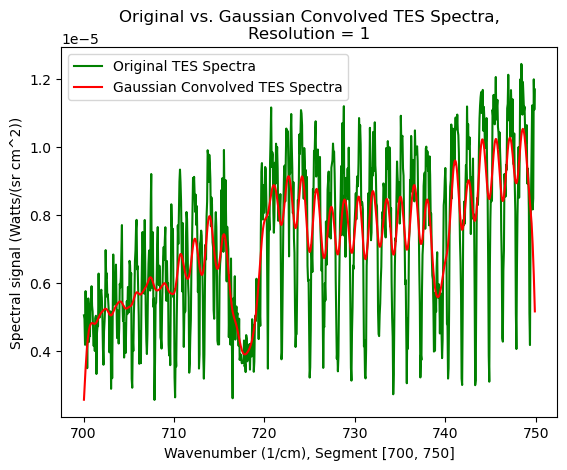

In [12]:
def gaussian(wavenumber: float, L: int) -> float:
    """
    wavenumber: (float) A float representing a wavenumber.
    L: (int) An int parameter for the Gaussian function.
    return: (float) A float representing a 'Gaussian blur' of the spectrum.
    
    'Gaussian blurs' the spectrum by the given parameter as described in the lab manual.
    """
    return np.exp(-(wavenumber / L)**2) / (np.sqrt(np.pi) * L)

# Calculating the specified function outputs
interval = np.arange(-3.0, 3.01, 0.06)
gauss = gaussian(interval, 0.5)
conv_gauss = np.convolve(spectra[834:1666], gauss, mode = "same")*0.06

# Plotting the results
plt.figure()
plt.plot(interval, gauss)
plt.title("Gaussian Function Specified Above")

plt.figure()
plt.plot(wavenumbers[834:1666], spectra[834:1666], color = 'g', label = 'Original TES Spectra')
plt.plot(wavenumbers[834:1666], conv_gauss, color='r', label = 'Gaussian Convolved TES Spectra')
plt.legend()
plt.xlabel("Wavenumber (1/cm), Segment [700, 750]")
plt.ylabel("Spectral signal (Watts/(sr cm^2))")
plt.title("Original vs. Gaussian Convolved TES Spectra,\nResolution = 1")

The Gaussian convolution makes it easier to see long-running trends in the data better than either of the convolutions in Part 4. Convolutions can be thought of as weighted averages and both functions in Part 4 were distributing said weight fairly evenly across the [-3, 3] interval, as can be seen in their plots in Part 2. In contrast, the Gaussian function is weighted largely just at 0, and rapidly drops off beyond -1 or 1. Because of this, its resultant convolution is much smoother than the previous.